# EBA3500 Lecture 10. Ordinal, categorical, and numeric covariates

We'll use a new data set this time!  It's a [global warming data set](https://rdrr.io/cran/processR/man/glbwarm.html).

In [1]:
import pyreadr, os, pathlib

def pyreadr_load(url, local_file = "temp_pyreadr.rda"):
  """Download the R dataset at the specified url into local_file, load the 
  local file, delete the local file. Return the dataset."""
  
  file_name = pyreadr.download_file(url, local_file)
  dataframe = pyreadr.read_r(file_name)
  os.remove(str(pathlib.Path().resolve()) + "/" + file_name)
  name = next(iter(dataframe.items()))[0]
  return dataframe[name]

In [2]:
url = 'https://github.com/cardiomoon/processR/blob/master/data/glbwarm.rda?raw=true'
glbwarm = pyreadr_load(url)
glbwarm.head()

,govact,posemot,negemot,ideology,age,sex,partyid
0,7.0,1.00,6.0,3.0,34.0,0.0,2.0
1,6.0,5.00,6.0,4.0,50.0,1.0,2.0
2,5.2,2.00,6.0,5.0,50.0,0.0,2.0
3,6.0,4.33,6.0,4.0,71.0,1.0,1.0
4,7.0,3.00,6.0,1.0,40.0,0.0,1.0


Some of these variables should be categorica, but are encoded as numeric. `sex` and `partyid` should definitely be categorical, while `ideology` may work either way.

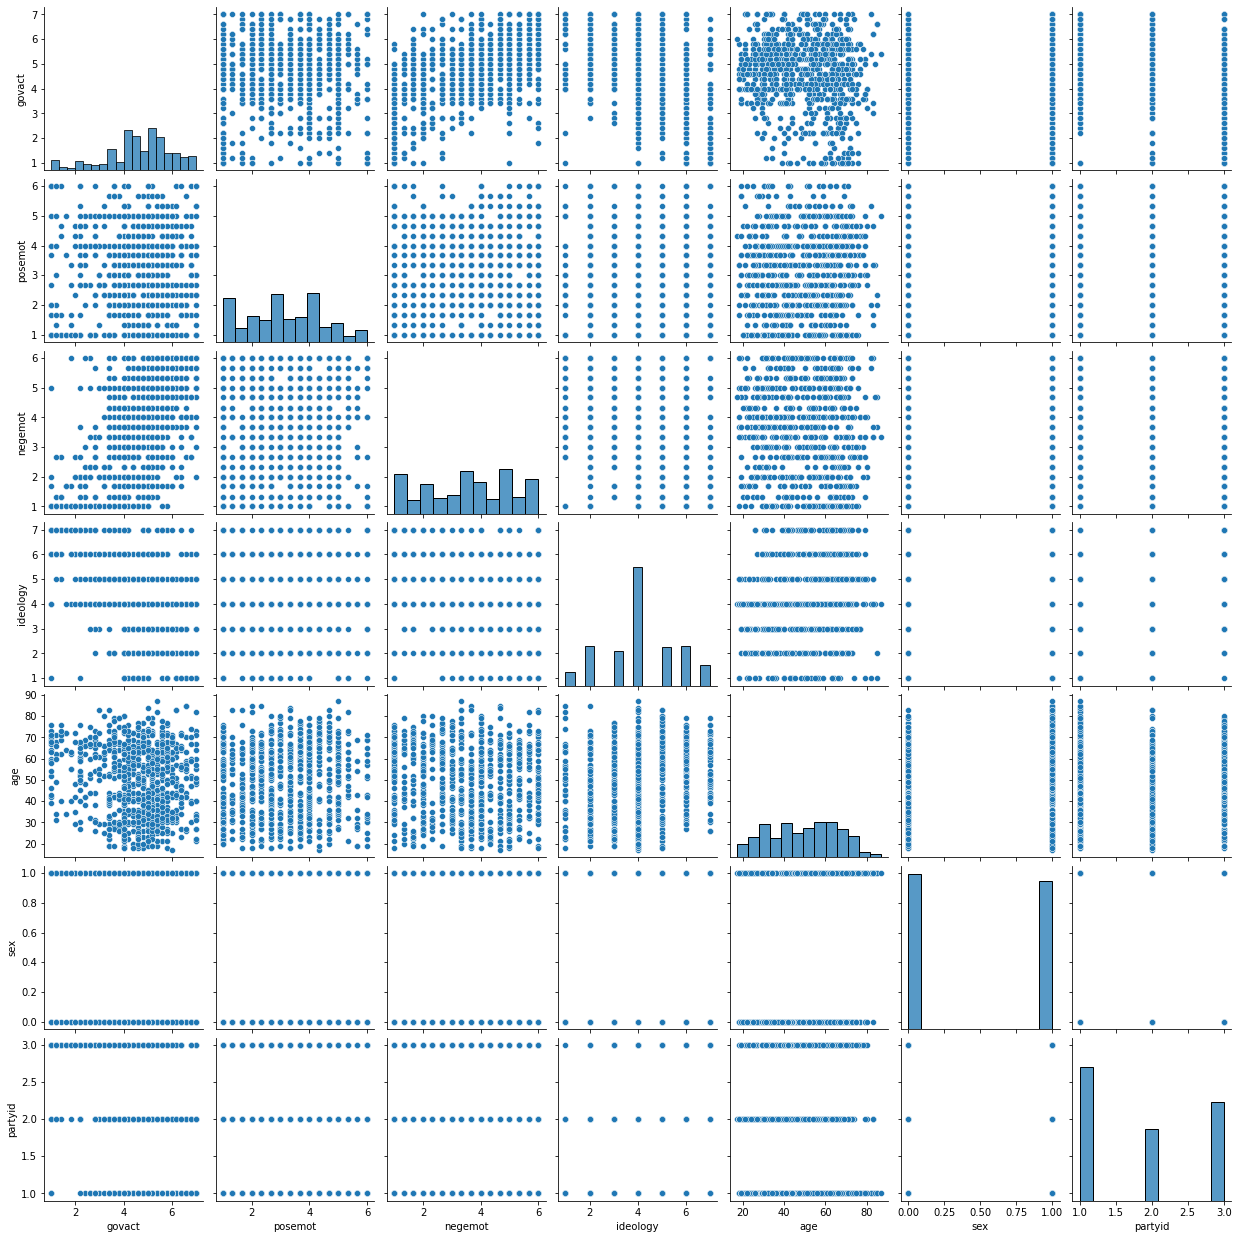

In [4]:
import seaborn as sns
sns.pairplot(glbwarm)

In [5]:
glbwarm.corr()

,govact,posemot,negemot,ideology,age,sex,partyid
govact,1.000000,0.043029,0.577746,-0.418320,-0.097139,-0.098619,-0.360396
posemot,0.043029,1.000000,0.127922,-0.029376,0.042352,0.074294,-0.035771
negemot,0.577746,0.127922,1.000000,-0.348786,-0.056895,-0.117356,-0.324191
ideology,-0.418320,-0.029376,-0.348786,1.000000,0.212406,0.132889,0.619454
age,-0.097139,0.042352,-0.056895,0.212406,1.000000,0.165530,0.154432
sex,-0.098619,0.074294,-0.117356,0.132889,0.165530,1.000000,0.108760
partyid,-0.360396,-0.035771,-0.324191,0.619454,0.154432,0.108760,1.000000


## Ordinal variables

`ideology` is an example of an ordinal variable, that is, an ordered categorical variable. This means that it is equipped with an order. Recall that its categories are
1. Very Liberal 
2. Liberal
3. Somewhat Liberal
4. Moderate
5. Somewhat Conservative
6. Conservative
7. Very Conservative

If was called `conservatism`, 1 would be the least conservatie, 7 the most conservative.

The problem with ordinal variables is that the numbers are *arbitrary*. We could also have written the numbers with a larger gap between very liberal and liberal than the gap between the other variables.
* 1 Very Liberal 
* 3 Liberal
* 4 Somewhat Liberal
* 5 Moderate
* 6 Somewhat Conservative
* 7 Conservative
* 8 Very Conservative

There are infinitely many ways to do this sort of thing. We call transformations of ordered categorical data into numeric variables a *coding*.


#### Definition (coding)
> A coding of the ordinal variables $I$ is a mapping of $I$ to the decimal numbers that respects the order of $I$. 

In [6]:
import statsmodels.formula.api as smf
fit_numeric = smf.ols("govact ~ ideology", data = glbwarm).fit()
fit_numeric.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     172.4
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           7.30e-36
Time:                        10:24:21   Log-Likelihood:                -1328.4
No. Observations:                 815   AIC:                             2661.
Df Residuals:                     813   BIC:                             2670.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1242      0.125     49.066      0.000       5.879       6.369
ideology      -0.3764      0.029    -13.132      0.000      -0.433      -0.320
==============================================================================
Omnibus:                       10.892   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.975
Skew:                          -0.281   Prob(JB):                      0.00414
Kurtosis:                       3.081   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
fit_cat = smf.ols("govact ~ C(ideology)", data = glbwarm).fit()
fit_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     32.30
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           6.01e-35
Time:                        10:25:34   Log-Likelihood:                -1319.2
No. Observations:                 815   AIC:                             2652.
Df Residuals:                     808   BIC:                             2685.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.4000      0.204     26.421      0.000       4.999       5.801
C(ideology)[T.2.0]    -0.1906      0.237     -0.806      0.421      -0.655       0.274
C(ideology)[T.3.0]    -0.2109      0.241     -0.875      0.382      -0.684       0.262
C(ideology)[T.4.0]    -0.7340      0.216     -3.404      0.001      -1.157      -0.311
C(ideology)[T.5.0]    -0.8667      0.238     -3.646      0.000      -1.333      -0.400
C(ideology)[T.6.0]    -1.6819      0.237     -7.101      0.000      -2.147      -1.217
C(ideology)[T.7.0]    -2.2250      0.262     -8.493      0.000      -2.739      -1.711
==============================================================================
Omnibus:                        5.044   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                4.920
Skew:                          -0.186   Prob(JB):                       0.0854
Kurtosis:                       3.078   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
fit_cat.params

Intercept             5.400000
C(ideology)[T.2.0]   -0.190566
C(ideology)[T.3.0]   -0.210870
C(ideology)[T.4.0]   -0.733962
C(ideology)[T.5.0]   -0.866667
C(ideology)[T.6.0]   -1.681905
C(ideology)[T.7.0]   -2.225000
dtype: float64

In [12]:
fit_numeric.params

Intercept    6.124194
ideology    -0.376448
dtype: float64

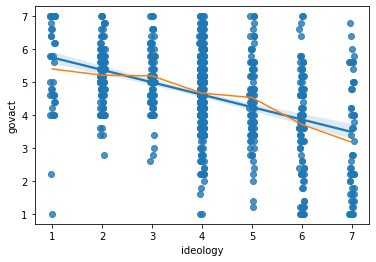

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.regplot(x="ideology", y="govact", data=glbwarm, x_jitter=.05);
x = np.arange(1, 8) # 1, 2, 3, 4, 5, 6, 7 (8 is not included!)
y = np.repeat(fit_cat.params[0], 7) + fit_cat.params
y[0] = fit_cat.params[0]
plt.plot(x, y)


This a quite close, but not the same. It seems like the effect of ideology is not linear in its current coding - but it is pretty close!

### Another example

In [9]:
import pandas as pd
url = "https://stats.idre.ucla.edu/stat/data/ologit.dta"
data_student = pd.read_stata(url)
data_student.head()


,apply,pared,public,gpa
0,very likely,0,0,3.26
1,somewhat likely,1,0,3.21
2,unlikely,1,1,3.94
3,somewhat likely,0,0,2.81
4,somewhat likely,0,0,2.53


In [10]:
data_student["apply"].dtype

CategoricalDtype(categories=['unlikely', 'somewhat likely', 'very likely'], ordered=True)

Notice that `data_student["apply"]` is ordered: `'unlikely' < 'somewhat likely' < 'very likely'`.

Let's run a regression using the categorical variable `apply`.

In [11]:
smf.ols("gpa ~ apply", data = data_student).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.819
Date:                Thu, 28 Oct 2021   Prob (F-statistic):            0.00856
Time:                        10:31:53   Log-Likelihood:                -193.70
No. Observations:                 400   AIC:                             393.4
Df Residuals:                     397   BIC:                             405.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.9521      0.027    111.083      0.000       2.900       3.004
apply[T.somewhat likely]     0.0779      0.043      1.829      0.068      -0.006       0.162
apply[T.very likely]         0.1951      0.068      2.880      0.004       0.062       0.328
==============================================================================
Omnibus:                        6.002   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                3.831
Skew:                          -0.000   Prob(JB):                        0.147
Kurtosis:                       2.521   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's see what happens with ordinary integer coding. We can use the `replace` method to this end.

In [13]:
data_student['apply_num'] = data_student['apply'].replace({'unlikely':1, 'somewhat likely':2, 'very likely':3})

In [14]:
smf.ols("gpa ~ apply_num", data = data_student).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     9.486
Date:                Thu, 28 Oct 2021   Prob (F-statistic):            0.00221
Time:                        10:33:41   Log-Likelihood:                -193.78
No. Observations:                 400   AIC:                             391.6
Df Residuals:                     398   BIC:                             399.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8584      0.050     57.528      0.000       2.761       2.956
apply_num      0.0907      0.029      3.080      0.002       0.033       0.149
==============================================================================
Omnibus:                        6.360   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                3.990
Skew:                          -0.001   Prob(JB):                        0.136
Kurtosis:                       2.511   Cond. No.                         5.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we've dealt with both numeric and categorical covariates, but on their own. Now let's mix them up!

## Using both categorical and ordinal variables at the same time
*Note*: Indicator variables are often called *dummy variables*, especially by economists. I have no idea why; they don't look like dummies to me. Indicator variable is the better terminology.


### Varying intercept and varying slope

Let's have a look at how `negemot` and `partyid` affects `govact`.

<AxesSubplot:xlabel='negemot', ylabel='govact'>

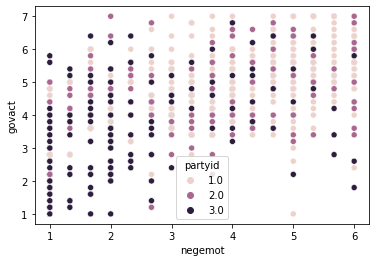

In [16]:
sns.scatterplot(x="negemot", y="govact", hue = "partyid", data=glbwarm)

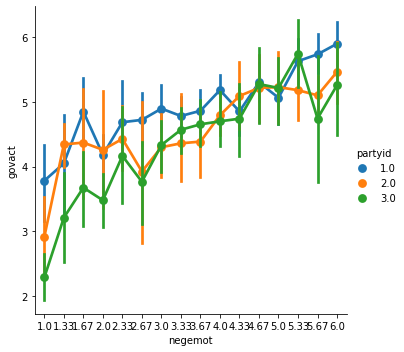

In [19]:
sns.catplot(x="negemot", y="govact", hue="partyid", kind="point", data=glbwarm)

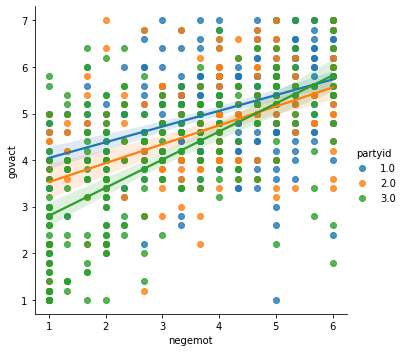

In [20]:
sns.lmplot(x ='negemot', y ='govact', data = glbwarm, hue ='partyid')

In [21]:
fit = smf.ols("govact ~ negemot * C(partyid)", data = glbwarm).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           2.08e-82
Time:                        10:41:02   Log-Likelihood:                -1210.0
No. Observations:                 815   AIC:                             2432.
Df Residuals:                     809   BIC:                             2460.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.7080      0.185     20.088      0.000       3.346       4.070
C(partyid)[T.2.0]            -0.5869      0.274     -2.141      0.033      -1.125      -0.049
C(partyid)[T.3.0]            -1.5086      0.230     -6.570      0.000      -1.959      -1.058
negemot                       0.3374      0.044      7.718      0.000       0.252       0.423
negemot:C(partyid)[T.2.0]     0.0689      0.067      1.023      0.307      -0.063       0.201
negemot:C(partyid)[T.3.0]     0.2658      0.060      4.394      0.000       0.147       0.384
==============================================================================
Omnibus:                       12.817   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.851
Skew:                          -0.223   Prob(JB):                     0.000596
Kurtosis:                       3.488   Cond. No.                         40.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is a verying intercept and varying slope model. Why? Because both vary across the levels of `partyid`!

Let's look at the varying intercept model too:

In [98]:
fit = smf.ols("govact ~ negemot + C(partyid)", data = glbwarm).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     156.9
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           3.38e-80
Time:                        19:38:17   Log-Likelihood:                -1220.3
No. Observations:                 815   AIC:                             2449.
Df Residuals:                     811   BIC:                             2467.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.2223      0.120     26.781      0.000       2.986       3.458
C(partyid)[T.2.0]    -0.2908      0.097     -2.985      0.003      -0.482      -0.100
C(partyid)[T.3.0]    -0.6082      0.093     -6.537      0.000      -0.791      -0.426
negemot               0.4582      0.026     17.401      0.000       0.406       0.510
==============================================================================
Omnibus:                       11.675   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.971
Skew:                          -0.261   Prob(JB):                      0.00252
Kurtosis:                       3.283   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Do we need the interaction term? (I.e., varying slopes!)

In [22]:
import statsmodels.api as sm
fit = smf.ols("govact ~ negemot * C(partyid)", data = glbwarm).fit()
sm.stats.anova_lm(fit, typ=1) # Use type 1! The others are trash. 

,df,sum_sq,mean_sq,F,PR(>F)
C(partyid),2.0,197.465881,98.732940,85.938592,1.435681e-34
negemot,1.0,355.869954,355.869954,309.754401,5.987845e-59
negemot:C(partyid),2.0,23.764160,11.882080,10.342336,3.671483e-05
Residual,809.0,929.442139,1.148878,NaN,NaN


Remember the interpretation here. The first row test `C(partyid)` against the model with no covariates. The second row tests the model with `C(partyid)` and `negemot` against the model with only `C(partyid)`, and so on. 

Since the *p*-value `negemot:C(partyid)` is smaller than `0.0001`, we can confidently keep the varying slope term.

### A larger model

These models are quite easy to handle and visualize. 

In [23]:
fit = smf.ols("govact ~ negemot * C(partyid) + negemot * C(sex) ", data = glbwarm).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     75.92
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           2.18e-84
Time:                        10:48:43   Log-Likelihood:                -1200.6
No. Observations:                 815   AIC:                             2417.
Df Residuals:                     807   BIC:                             2455.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.0343      0.199     20.273      0.000       3.644       4.425
C(partyid)[T.2.0]            -0.4459      0.274     -1.625      0.104      -0.985       0.093
C(partyid)[T.3.0]            -1.3450      0.232     -5.798      0.000      -1.800      -0.890
C(sex)[T.1.0]                -0.7907      0.194     -4.066      0.000      -1.172      -0.409
negemot                       0.2467      0.048      5.125      0.000       0.152       0.341
negemot:C(partyid)[T.2.0]     0.0385      0.067      0.573      0.567      -0.093       0.171
negemot:C(partyid)[T.3.0]     0.2309      0.061      3.804      0.000       0.112       0.350
negemot:C(sex)[T.1.0]         0.2152      0.050      4.324      0.000       0.118       0.313
==============================================================================
Omnibus:                        8.785   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.508
Skew:                          -0.188   Prob(JB):                      0.00862
Kurtosis:                       3.372   Cond. No.                         45.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
sm.stats.anova_lm(fit, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(partyid),2.0,197.465881,98.732940,87.716841,3.381523e-35
C(sex),1.0,5.564086,5.564086,4.943274,2.646858e-02
negemot,1.0,350.765002,350.765002,311.628499,3.185904e-59
negemot:C(partyid),2.0,23.355767,11.677883,10.374927,3.557781e-05
negemot:C(sex),1.0,21.042653,21.042653,18.694825,1.725866e-05
Residual,807.0,908.348746,1.125587,NaN,NaN


In [25]:
fit = smf.ols("govact ~ negemot * C(partyid) + negemot * C(sex) + negemot * C(ideology)", data = glbwarm).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     32.90
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           7.70e-87
Time:                        10:51:23   Log-Likelihood:                -1170.4
No. Observations:                 815   AIC:                             2381.
Df Residuals:                     795   BIC:                             2475.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      4.0511      0.608      6.665      0.000       2.858       5.244
C(partyid)[T.2.0]             -0.2812      0.285     -0.986      0.325      -0.841       0.279
C(partyid)[T.3.0]             -0.2934      0.299     -0.983      0.326      -0.879       0.293
C(sex)[T.1.0]                 -0.6909      0.191     -3.626      0.000      -1.065      -0.317
C(ideology)[T.2.0]             0.4017      0.687      0.585      0.559      -0.947       1.750
C(ideology)[T.3.0]             0.3762      0.720      0.523      0.601      -1.036       1.789
C(ideology)[T.4.0]            -0.0865      0.630     -0.137      0.891      -1.323       1.150
C(ideology)[T.5.0]            -0.2312      0.679     -0.340      0.734      -1.565       1.103
C(ideology)[T.6.0]            -1.5424      0.673     -2.291      0.022      -2.864      -0.221
C(ideology)[T.7.0]            -1.7752      0.693     -2.562      0.011      -3.135      -0.415
negemot                        0.3043      0.136      2.241      0.025       0.038       0.571
negemot:C(partyid)[T.2.0]      0.0353      0.070      0.501      0.616      -0.103       0.173
negemot:C(partyid)[T.3.0]      0.0357      0.076      0.472      0.637      -0.113       0.184
negemot:C(sex)[T.1.0]          0.1948      0.049      3.996      0.000       0.099       0.290
negemot:C(ideology)[T.2.0]    -0.1280      0.154     -0.829      0.407      -0.431       0.175
negemot:C(ideology)[T.3.0]    -0.1211      0.163     -0.741      0.459      -0.442       0.200
negemot:C(ideology)[T.4.0]    -0.0884      0.143     -0.618      0.537      -0.369       0.192
negemot:C(ideology)[T.5.0]    -0.0490      0.157     -0.311      0.756      -0.358       0.260
negemot:C(ideology)[T.6.0]     0.2558      0.158      1.617      0.106      -0.055       0.566
negemot:C(ideology)[T.7.0]     0.2486      0.170      1.464      0.144      -0.085       0.582
==============================================================================
Omnibus:                       10.735   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               15.594
Skew:                          -0.099   Prob(JB):                     0.000411
Kurtosis:                       3.648   Cond. No.                         234.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
sm.stats.anova_lm(fit, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(partyid),2.0,197.465881,98.732940,93.071578,4.811860e-37
C(sex),1.0,5.564086,5.564086,5.245040,2.227048e-02
C(ideology),6.0,114.698008,19.116335,18.020201,1.148550e-19
negemot,1.0,283.275117,283.275117,267.032077,5.701953e-52
negemot:C(partyid),2.0,14.777425,7.388712,6.965043,1.003035e-03
negemot:C(sex),1.0,20.766668,20.766668,19.575904,1.101588e-05
negemot:C(ideology),6.0,26.636655,4.439443,4.184884,3.745411e-04
Residual,795.0,843.358296,1.060828,NaN,NaN


In [28]:
fit = smf.ols("govact ~ negemot * C(partyid) + negemot * C(sex) + negemot * C(ideology) + age", data = glbwarm).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     31.24
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           4.00e-86
Time:                        10:55:39   Log-Likelihood:                -1170.3
No. Observations:                 815   AIC:                             2383.
Df Residuals:                     794   BIC:                             2481.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      4.1114      0.621      6.624      0.000       2.893       5.330
C(partyid)[T.2.0]             -0.2888      0.286     -1.011      0.313      -0.850       0.272
C(partyid)[T.3.0]             -0.2893      0.299     -0.968      0.333      -0.876       0.297
C(sex)[T.1.0]                 -0.6867      0.191     -3.599      0.000      -1.061      -0.312
C(ideology)[T.2.0]             0.3858      0.688      0.561      0.575      -0.965       1.737
C(ideology)[T.3.0]             0.3665      0.720      0.509      0.611      -1.047       1.780
C(ideology)[T.4.0]            -0.0982      0.630     -0.156      0.876      -1.336       1.139
C(ideology)[T.5.0]            -0.2267      0.680     -0.333      0.739      -1.561       1.108
C(ideology)[T.6.0]            -1.5398      0.674     -2.286      0.023      -2.862      -0.218
C(ideology)[T.7.0]            -1.7818      0.693     -2.570      0.010      -3.143      -0.421
negemot                        0.3025      0.136      2.226      0.026       0.036       0.569
negemot:C(partyid)[T.2.0]      0.0360      0.070      0.512      0.609      -0.102       0.174
negemot:C(partyid)[T.3.0]      0.0347      0.076      0.458      0.647      -0.114       0.183
negemot:C(sex)[T.1.0]          0.1950      0.049      4.000      0.000       0.099       0.291
negemot:C(ideology)[T.2.0]    -0.1246      0.155     -0.806      0.420      -0.428       0.179
negemot:C(ideology)[T.3.0]    -0.1190      0.164     -0.728      0.467      -0.440       0.202
negemot:C(ideology)[T.4.0]    -0.0855      0.143     -0.597      0.551      -0.367       0.196
negemot:C(ideology)[T.5.0]    -0.0484      0.158     -0.307      0.759      -0.358       0.261
negemot:C(ideology)[T.6.0]     0.2571      0.158      1.624      0.105      -0.054       0.568
negemot:C(ideology)[T.7.0]     0.2524      0.170      1.484      0.138      -0.081       0.586
age                           -0.0011      0.002     -0.485      0.628      -0.006       0.003
==============================================================================
Omnibus:                       10.378   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               14.891
Skew:                          -0.098   Prob(JB):                     0.000584
Kurtosis:                       3.633   Cond. No.                     2.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
sm.stats.anova_lm(fit, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(partyid),2.0,197.465881,98.732940,92.982035,5.227677e-37
C(sex),1.0,5.564086,5.564086,5.239994,2.233506e-02
C(ideology),6.0,114.698008,19.116335,18.002864,1.204701e-19
negemot,1.0,283.275117,283.275117,266.775169,6.401688e-52
negemot:C(partyid),2.0,14.777425,7.388712,6.958342,1.009738e-03
negemot:C(sex),1.0,20.766668,20.766668,19.557070,1.112416e-05
negemot:C(ideology),6.0,26.636655,4.439443,4.180858,3.783678e-04
age,1.0,0.249684,0.249684,0.235141,6.278716e-01
Residual,794.0,843.108612,1.061850,NaN,NaN


In [30]:
fit = smf.ols("govact ~ negemot * C(partyid) + negemot * C(sex) + negemot * C(ideology) + posemot", data = glbwarm).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     31.34
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           2.29e-86
Time:                        10:56:33   Log-Likelihood:                -1169.7
No. Observations:                 815   AIC:                             2381.
Df Residuals:                     794   BIC:                             2480.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      4.1115      0.610      6.742      0.000       2.914       5.308
C(partyid)[T.2.0]             -0.3053      0.286     -1.068      0.286      -0.867       0.256
C(partyid)[T.3.0]             -0.2844      0.299     -0.952      0.341      -0.871       0.302
C(sex)[T.1.0]                 -0.6826      0.191     -3.581      0.000      -1.057      -0.308
C(ideology)[T.2.0]             0.4254      0.687      0.619      0.536      -0.923       1.774
C(ideology)[T.3.0]             0.3993      0.720      0.555      0.579      -1.013       1.812
C(ideology)[T.4.0]            -0.0548      0.630     -0.087      0.931      -1.292       1.182
C(ideology)[T.5.0]            -0.1970      0.680     -0.290      0.772      -1.532       1.138
C(ideology)[T.6.0]            -1.5295      0.673     -2.272      0.023      -2.851      -0.208
C(ideology)[T.7.0]            -1.7613      0.693     -2.543      0.011      -3.121      -0.402
negemot                        0.3114      0.136      2.292      0.022       0.045       0.578
negemot:C(partyid)[T.2.0]      0.0411      0.071      0.583      0.560      -0.097       0.180
negemot:C(partyid)[T.3.0]      0.0331      0.076      0.438      0.662      -0.115       0.181
negemot:C(sex)[T.1.0]          0.1948      0.049      3.998      0.000       0.099       0.290
negemot:C(ideology)[T.2.0]    -0.1311      0.154     -0.849      0.396      -0.434       0.172
negemot:C(ideology)[T.3.0]    -0.1246      0.163     -0.763      0.446      -0.445       0.196
negemot:C(ideology)[T.4.0]    -0.0933      0.143     -0.652      0.515      -0.374       0.188
negemot:C(ideology)[T.5.0]    -0.0563      0.158     -0.357      0.721      -0.366       0.253
negemot:C(ideology)[T.6.0]     0.2560      0.158      1.619      0.106      -0.054       0.566
negemot:C(ideology)[T.7.0]     0.2469      0.170      1.454      0.146      -0.086       0.580
posemot                       -0.0323      0.027     -1.177      0.240      -0.086       0.022
==============================================================================
Omnibus:                       10.325   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               14.819
Skew:                          -0.097   Prob(JB):                     0.000605
Kurtosis:                       3.632   Cond. No.                         274.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
sm.stats.anova_lm(fit, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(partyid),2.0,197.465881,98.732940,93.116562,4.687895e-37
C(sex),1.0,5.564086,5.564086,5.247575,2.223861e-02
C(ideology),6.0,114.698008,19.116335,18.028911,1.127436e-19
negemot,1.0,283.275117,283.275117,267.161141,5.537819e-52
negemot:C(partyid),2.0,14.777425,7.388712,6.968409,9.997971e-04
negemot:C(sex),1.0,20.766668,20.766668,19.585365,1.096454e-05
negemot:C(ideology),6.0,26.636655,4.439443,4.186907,3.727291e-04
posemot,1.0,1.467735,1.467735,1.384244,2.397322e-01
Residual,794.0,841.890561,1.060316,NaN,NaN


In [32]:
fit = smf.ols("govact ~ negemot * (C(partyid) * C(sex) * C(ideology))", data = glbwarm).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     9.209
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           5.10e-67
Time:                        10:58:16   Log-Likelihood:                -1132.1
No. Observations:                 815   AIC:                             2420.
Df Residuals:                     737   BIC:                             2787.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      4.1313      0.823      5.022      0.000       2.516       5.746
C(partyid)[T.2.0]                                              3.2546      2.787      1.168      0.243      -2.217       8.726
C(partyid)[T.3.0]                                              3.6622      1.690      2.167      0.031       0.344       6.980
C(sex)[T.1.0]                                                  1.4642      1.486      0.986      0.325      -1.452       4.381
C(ideology)[T.2.0]                                            -0.1112      0.931     -0.119      0.905      -1.940       1.717
C(ideology)[T.3.0]                                            -0.3894      1.143     -0.341      0.733      -2.633       1.854
C(ideology)[T.4.0]                                            -0.2608      0.894     -0.292      0.771      -2.017       1.495
C(ideology)[T.5.0]                                            -1.1348      1.243     -0.913      0.361      -3.574       1.305
C(ideology)[T.6.0]                                            -0.5422      1.772     -0.306      0.760      -4.022       2.937
C(ideology)[T.7.0]                                            -3.9487      1.562     -2.527      0.012      -7.016      -0.881
C(partyid)[T.2.0]:C(sex)[T.1.0]                               -7.4226      2.809     -2.642      0.008     -12.937      -1.908
C(partyid)[T.3.0]:C(sex)[T.1.0]                                0.0302      1.322      0.023      0.982      -2.565       2.625
C(partyid)[T.2.0]:C(ideology)[T.2.0]                           0.0278      3.286      0.008      0.993      -6.423       6.478
C(partyid)[T.3.0]:C(ideology)[T.2.0]                          18.8132      9.914      1.898      0.058      -0.650      38.277
C(partyid)[T.2.0]:C(ideology)[T.3.0]                          -2.6584      2.970     -0.895      0.371      -8.488       3.172
C(partyid)[T.3.0]:C(ideology)[T.3.0]                          -0.9578      2.522     -0.380      0.704      -5.910       3.994
C(partyid)[T.2.0]:C(ideology)[T.4.0]                          -3.7146      2.819     -1.318      0.188      -9.248       1.819
C(partyid)[T.3.0]:C(ideology)[T.4.0]                          -3.6645      1.757     -2.086      0.037      -7.114      -0.215
C(partyid)[T.2.0]:C(ideology)[T.5.0]                          -3.2386      3.036     -1.067      0.286      -9.199       2.721
C(partyid)[T.3.0]:C(ideology)[T.5.0]                          -2.8134      1.918     -1.467      0.143      -6.578       0.952
C(partyid)[T.2.0]:C(ideology)[T.6.0]                           1.6667      3.448      0.483      0.629      -5.103       8.436
C(partyid)[T.3.0]:C(ideology)[T.6.0

That's a lot of parameters! In fact, there are $2\cdot 2 \cdot 7 \cdot 3$ of them! (Why?)

In [33]:
sm.stats.anova_lm(fit, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(partyid),2.0,197.465881,98.732940,94.772316,2.352456e-37
C(sex),1.0,5.564086,5.564086,5.340885,2.110599e-02
C(ideology),6.0,114.698008,19.116335,18.349492,6.269078e-20
C(partyid):C(sex),2.0,25.153107,12.576554,12.072051,6.937797e-06
C(partyid):C(ideology),12.0,35.519503,2.959959,2.841221,7.927000e-04
C(sex):C(ideology),6.0,4.891741,0.815290,0.782585,5.837072e-01
C(partyid):C(sex):C(ideology),12.0,23.355062,1.946255,1.868182,3.498782e-02
negemot,1.0,251.345747,251.345747,241.263133,2.812632e-47
negemot:C(partyid),2.0,16.154974,8.077487,7.753463,4.652106e-04
negemot:C(sex),1.0,10.271272,10.271272,9.859245,1.757264e-03


Plenty of these $p$-values are insignificant. It seems, roughly, like the interactions with `negemot` of order more than $2$ should be removed, while we may keep the interaction between `partyid` and `sex`, and the interaction between `partyid` and `ideology`. 

In [34]:
fit = smf.ols("govact ~ negemot * (C(partyid) + C(sex) + C(ideology)) + C(partyid)*(C(sex) + C(ideology))", data = glbwarm).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     19.92
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           5.96e-82
Time:                        11:01:58   Log-Likelihood:                -1157.9
No. Observations:                 815   AIC:                             2384.
Df Residuals:                     781   BIC:                             2544.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                4.5575      0.657      6.939      0.000       3.268       5.847
C(partyid)[T.2.0]                       -1.7758      0.703     -2.526      0.012      -3.156      -0.396
C(partyid)[T.3.0]                       -1.3072      1.088     -1.201      0.230      -3.443       0.829
C(sex)[T.1.0]                           -0.3633      0.237     -1.531      0.126      -0.829       0.102
C(ideology)[T.2.0]                      -0.2506      0.733     -0.342      0.732      -1.689       1.187
C(ideology)[T.3.0]                      -0.2358      0.774     -0.305      0.761      -1.756       1.284
C(ideology)[T.4.0]                      -0.7739      0.686     -1.128      0.260      -2.120       0.572
C(ideology)[T.5.0]                      -0.6733      0.761     -0.885      0.376      -2.166       0.820
C(ideology)[T.6.0]                      -2.4842      0.851     -2.919      0.004      -4.155      -0.814
C(ideology)[T.7.0]                      -3.1561      0.942     -3.349      0.001      -5.006      -1.306
C(partyid)[T.2.0]:C(sex)[T.1.0]         -0.0784      0.188     -0.418      0.676      -0.447       0.290
C(partyid)[T.3.0]:C(sex)[T.1.0]         -0.4536      0.183     -2.480      0.013      -0.813      -0.095
C(partyid)[T.2.0]:C(ideology)[T.2.0]     1.6573      0.726      2.282      0.023       0.232       3.083
C(partyid)[T.3.0]:C(ideology)[T.2.0]     0.2659      1.205      0.221      0.825      -2.100       2.632
C(partyid)[T.2.0]:C(ideology)[T.3.0]     1.8003      0.728      2.473      0.014       0.371       3.229
C(partyid)[T.3.0]:C(ideology)[T.3.0]     1.0859      1.115      0.973      0.331      -1.104       3.276
C(partyid)[T.2.0]:C(ideology)[T.4.0]     1.6103      0.670      2.404      0.016       0.295       2.925
C(partyid)[T.3.0]:C(ideology)[T.4.0]     1.2239      1.056      1.159      0.247      -0.848       3.296
C(partyid)[T.2.0]:C(ideology)[T.5.0]     0.7482      0.745      1.004      0.316      -0.714       2.211
C(partyid)[T.3.0]:C(ideology)[T.5.0]     1.1081      1.074      1.032      0.302      -0.999       3.216
C(partyid)[T.2.0]:C(ideology)[T.6.0]     1.8039      0.805      2.241      0.025       0.224       3.384
C(partyid)[T.3.0]:C(ideology)[T.6.0]     1.5058      1.112      1.355      0.176      -0.676       3.688
C(partyid)[T.2.0]:C(ideology)[T.7.0]     1.7906      1.036      1.728      0.084      -0.243       3.825
C(partyid)[T.3.0]:C(ideology)[T.7.0]     1.9697      1.215      1.620      0.106      -0.416       4.356
negemot                                  0.2107      0.142      1.479      0.139      -0.069       0.490
negemot:C(partyid)[T.2.0]                0.0323      0.072      0.450      0.653      -0.109       0.173
negemot:C(partyid)[T.3.0]             

In [35]:
sm.stats.anova_lm(fit, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(partyid),2.0,197.465881,98.732940,94.266339,2.126138e-37
C(sex),1.0,5.564086,5.564086,5.312371,2.143593e-02
C(ideology),6.0,114.698008,19.116335,18.251526,6.720807e-20
C(partyid):C(sex),2.0,25.153107,12.576554,12.007600,7.306935e-06
C(partyid):C(ideology),12.0,35.519503,2.959959,2.826052,8.356152e-04
negemot,1.0,254.373962,254.373962,242.866281,7.020873e-48
negemot:C(partyid),2.0,15.482445,7.741223,7.391016,6.608783e-04
negemot:C(sex),1.0,13.067211,13.067211,12.476060,4.363931e-04
negemot:C(ideology),6.0,27.211977,4.535330,4.330155,2.616335e-04
Residual,781.0,818.005956,1.047383,NaN,NaN


## Occam's razor
When you wish to use statistics to *explain*, it is expected that you follow Occam's razor, and keep the model as simple as you can.

> “It can scarcely be denied that the supreme goal of all theory is to make the irreducible basic elements as simple and as few as possible without having to surrender the adequate representation of a single datum of experience.” - Albert Einstein (1933)

> Everything should be made as simple as possible, but no simpler. - Roger Sessions (1950)


> "It is superfluous to suppose that what can be accounted for by a few principles has been produced by many." - Thomas Acquinas in *Summa Theologica*


### In regression models
Occam's razor implores you to remove as many regression coefficients as you can, while keeping the model complicated enough to account for the data.
This is sometimes relatively straight-forward to do, but often it isn't, especially when models include many covariates. 

When models include reasonably few covariates, we may decide on which variables to keep by looking at *p*-values.